In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from data.imagenet_labels import imagenet_labels

In [3]:
def decode_fn(record_bytes):
    example = tf.io.parse_single_example(
        # Data
        record_bytes,

        # Schema
        {"image": tf.io.FixedLenFeature([], dtype=tf.string),
         "label": tf.io.FixedLenFeature([], dtype=tf.int64)}
            )
    image = tf.io.parse_tensor(example["image"],
                               out_type = tf.uint8)
    label = example["label"]
    return image, label

In [4]:
path = './data/TFRs/train/'
files = [path+n for n in os.listdir(path)]
ds = tf.data.TFRecordDataset(files).map(decode_fn)

In [5]:
_ds = ds.batch(5)

beaver


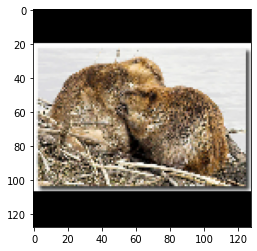

pitcher, ewer


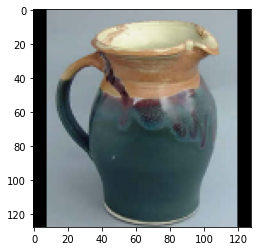

jackfruit, jak, jack


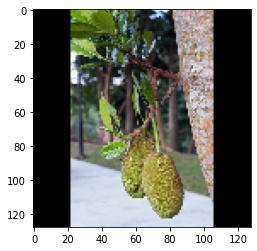

jay


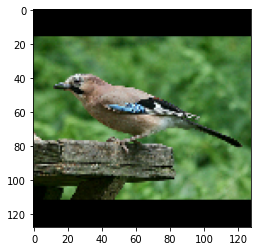

dock, dockage, docking facility


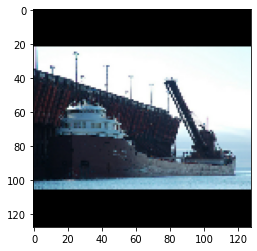

In [8]:
for ex in _ds.take(1):
    for i in range(len(ex[0])):
        print(imagenet_labels[ex[1][i].numpy()])
        plt.imshow(ex[0][i])
        plt.show()